<a href="https://colab.research.google.com/github/AndrewMinyoungKim/MNIST-Digit-Autoencoder/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

## Load Dataset

In [ ]:
(X_train, Y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_val_split = int(len(X_train) * 0.9)
X_train, x_test = X_train.astype(np.float32) / 255, x_test.astype(np.float32) / 255
x_train, x_val = X_train[:train_val_split], X_train[train_val_split:]
y_train, y_val = Y_train[:train_val_split], Y_train[train_val_split:]

## Define Autoencoder Neural Network Model

In [ ]:
tf.random.set_seed(1)
np.random.seed(1)

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[20]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 20)                80520     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            81284     
                                                                 
Total params: 161804 (632.05 KB)
Trainable params: 161804 (632.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.5), metrics=['accuracy'])

## Fit the Model

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, validation_data=(x_val, x_val))

Epoch 1/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0816 - accuracy: 0.0701 - val_loss: 0.0650 - val_accuracy: 0.0857
Epoch 2/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0587 - accuracy: 0.1046 - val_loss: 0.0527 - val_accuracy: 0.1239
Epoch 3/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0484 - accuracy: 0.1365 - val_loss: 0.0439 - val_accuracy: 0.1552
Epoch 4/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0413 - accuracy: 0.1595 - val_loss: 0.0389 - val_accuracy: 0.1693
Epoch 5/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0376 - accuracy: 0.1684 - val_loss: 0.0357 - val_accuracy: 0.1769
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.1756 - val_loss: 0.0325 - val_accuracy: 0.1865
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0313 - accuracy: 0.1874 - val_loss: 0.0299 - val_accurac

## Testing Model by Comparison between Real and Fake images

In [ ]:
def display_real_vs_generated(model, img, n_img=5):
    generated_images = model.predict(img[:n_img])
    plt.figure(figsize=(n_img * 2, 5))
    for i in range(n_img):
        plt.subplot(2, n_img, i+1)
        plt.imshow(img[i])
        plt.axis("off")

        plt.subplot(2, n_img, n_img+i+1)
        plt.imshow(generated_images[i])
        plt.axis("off")

1/1 [==============================] - 0s 55ms/step


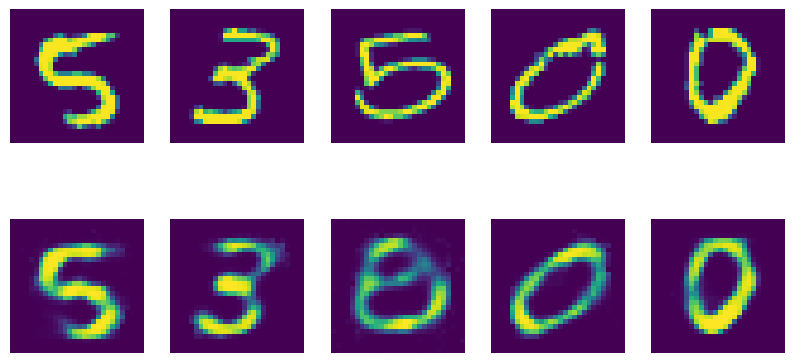

In [ ]:
display_real_vs_generated(autoencoder, x_val)

1/1 [==============================] - 0s 117ms/step


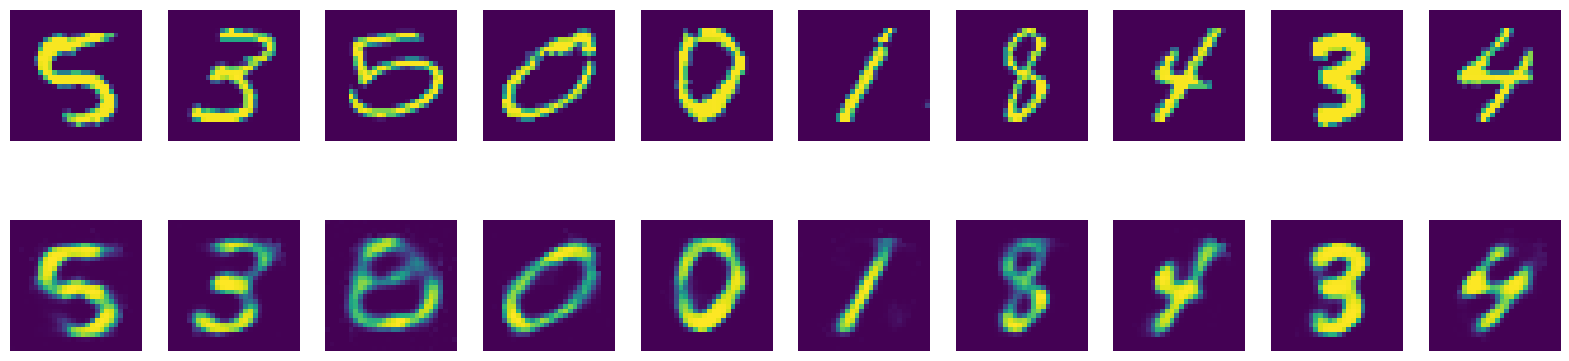

In [ ]:
display_real_vs_generated(autoencoder, x_val, 10)

1/1 [==============================] - 0s 15ms/step


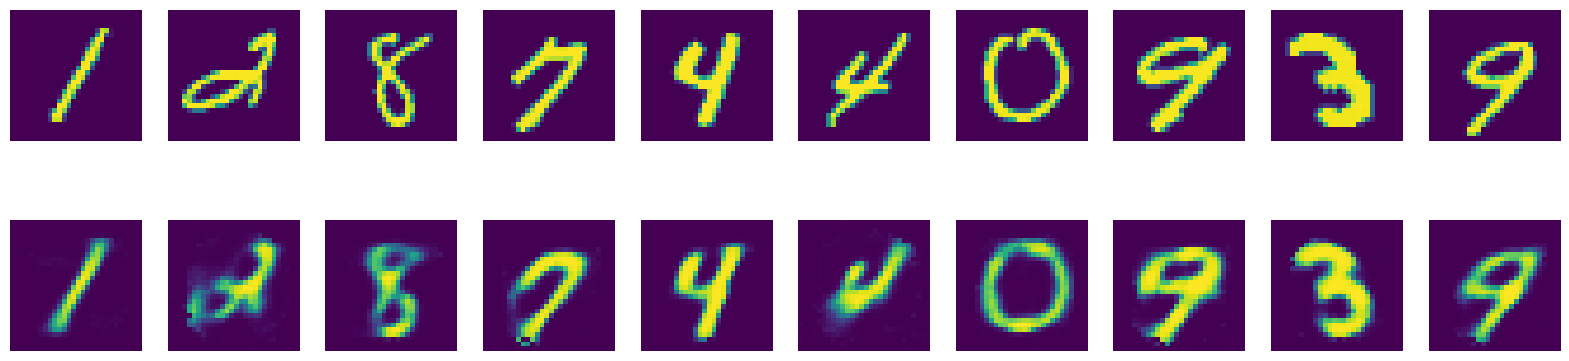

In [ ]:
display_real_vs_generated(autoencoder, x_val, 10)